In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
PATH = 'https://finance.naver.com/'
resp = requests.get(PATH)

In [3]:
resp #requests 응답 요청 객체

<Response [200]>

In [4]:
resp?

In [5]:
resp.text

'<html lang="ko">\n <head> \n  <title>네이버페이 증권</title> \n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" /> \n  <meta http-equiv="Content-Script-Type" content="text/javascript" /> \n  <meta http-equiv="Content-Style-Type" content="text/css" /> \n  <meta name="apple-mobile-web-app-title" content="네이버페이 증권" /> \n  <meta property="og:title" content="네이버페이 증권" /> \n  <meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" /> \n  <meta property="og:url" content="https://finance.naver.com" /> \n  <meta property="og:description" content="국내 해외 증시 지수, 시장지표, 뉴스, 증권사 리서치 등 제공" /> \n  <meta property="og:type" content="article" /> \n  <meta property="og:article:thumbnailUrl" content="" /> \n  <meta property="og:article:author" content="네이버페이 증권" /> \n  <meta property="og:article:author:url" content="http://FINANCE.NAVER.COM" /> \n  <link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/202312051749

In [6]:
print(resp.text)

<html lang="ko">
 <head> 
  <title>네이버페이 증권</title> 
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" /> 
  <meta http-equiv="Content-Script-Type" content="text/javascript" /> 
  <meta http-equiv="Content-Style-Type" content="text/css" /> 
  <meta name="apple-mobile-web-app-title" content="네이버페이 증권" /> 
  <meta property="og:title" content="네이버페이 증권" /> 
  <meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" /> 
  <meta property="og:url" content="https://finance.naver.com" /> 
  <meta property="og:description" content="국내 해외 증시 지수, 시장지표, 뉴스, 증권사 리서치 등 제공" /> 
  <meta property="og:type" content="article" /> 
  <meta property="og:article:thumbnailUrl" content="" /> 
  <meta property="og:article:author" content="네이버페이 증권" /> 
  <meta property="og:article:author:url" content="http://FINANCE.NAVER.COM" /> 
  <link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231205174942/css/finance_h

In [7]:
src = resp.text

In [8]:
soup = BeautifulSoup(src, 'lxml') 
print(soup)

<html lang="ko">
<head>
<title>네이버페이 증권</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="네이버페이 증권" name="apple-mobile-web-app-title"/>
<meta content="네이버페이 증권" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="https://finance.naver.com" property="og:url"/>
<meta content="국내 해외 증시 지수, 시장지표, 뉴스, 증권사 리서치 등 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버페이 증권" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231205174942/css/finance_header.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgsto

In [10]:
# 뉴스 목록 찾기
srclist = soup.select('.section_strategy a')
srclist

[<a href="/news/news_read.naver?mode=mainnews&amp;office_id=008&amp;article_id=0004972329" onclick="clickcr(this, 'tdn.list', '008_0004972329', '0', event);">고영, 차세대 반도체 수혜주…장밋빛 전망에 5% 급등</a>,
 <a href="/news/news_read.naver?mode=mainnews&amp;office_id=003&amp;article_id=0012258840" onclick="clickcr(this, 'tdn.list', '003_0012258840', '1', event);">'美 로봇 업체' 인수 추진에…LIG넥스원, 22% 급등</a>,
 <a href="/news/news_read.naver?mode=mainnews&amp;office_id=015&amp;article_id=0004923846" onclick="clickcr(this, 'tdn.list', '015_0004923846', '2', event);">"내년이 두렵다"…H지수 ELS 손실 최소화하려면 [H리포트]</a>,
 <a href="/news/news_read.naver?mode=mainnews&amp;office_id=016&amp;article_id=0002236940" onclick="clickcr(this, 'tdn.list', '016_0002236940', '3', event);">한국앤컴퍼니 공개매수가 상향?…MBK “단일투자규모 제한, 마지노선 5600억” [투자360]</a>,
 <a href="/news/news_read.naver?mode=mainnews&amp;office_id=008&amp;article_id=0004972321" onclick="clickcr(this, 'tdn.list', '008_0004972321', '4', event);">'이낙연 신당' 기대감? 테마주 급등</a>,
 <a href="/new

In [12]:
print(len(srclist)) # 더보기까지 포함

7


In [13]:
srclist = soup.select('.section_strategy li a') # 더보기 제외
len(srclist)

6

In [15]:
srclist = soup.select('.news_area a')[:-1] # 더보기 제외 
len(srclist)

6

In [16]:
sample=srclist[0]

In [17]:
sample?

In [18]:
print(sample) # DOM객체 임으로 string매서드가 아님 
# a 태그 안에 속성이 담겨 있음 /딕셔너리 객체

<a href="/news/news_read.naver?mode=mainnews&amp;office_id=008&amp;article_id=0004972329" onclick="clickcr(this, 'tdn.list', '008_0004972329', '0', event);">고영, 차세대 반도체 수혜주…장밋빛 전망에 5% 급등</a>


In [19]:
sample.text

'고영, 차세대 반도체 수혜주…장밋빛 전망에 5% 급등'

In [20]:
sample['href'] # 딕셔너리 key값으로 가져옴

'/news/news_read.naver?mode=mainnews&office_id=008&article_id=0004972329'

# 상대 URL을 절대 URL로 변환하기

In [22]:
href = sample['href']

In [23]:
# //가 중복되는 문제처럼 생각보다 합치는게 번거로울 때가 있음
PATH + href # //news와 같이 슬래쉬가 2개 생겨서 작동 안됨

'https://finance.naver.com//news/news_read.naver?mode=mainnews&office_id=008&article_id=0004972329'

In [24]:
from urllib.parse import urljoin

In [26]:
urljoin(PATH, href) # url join

'https://finance.naver.com/news/news_read.naver?mode=mainnews&office_id=008&article_id=0004972329'

In [27]:
# 제목과 url 데이터 목록 만들기
news_title= []
news_url = []

for n in srclist: 
    # 태그 객체의 메서드(.txt)를 쓰려면 태그 객체별로 빼줘야함
    title = n.text
    url = urljoin(PATH, n['href'])
    print(title, url)
    news_title.append(title)
    news_url.append(url)  

고영, 차세대 반도체 수혜주…장밋빛 전망에 5% 급등 https://finance.naver.com/news/news_read.naver?mode=mainnews&office_id=008&article_id=0004972329
'美 로봇 업체' 인수 추진에…LIG넥스원, 22% 급등 https://finance.naver.com/news/news_read.naver?mode=mainnews&office_id=003&article_id=0012258840
"내년이 두렵다"…H지수 ELS 손실 최소화하려면 [H리포트] https://finance.naver.com/news/news_read.naver?mode=mainnews&office_id=015&article_id=0004923846
한국앤컴퍼니 공개매수가 상향?…MBK “단일투자규모 제한, 마지노선 5600억” [투자360] https://finance.naver.com/news/news_read.naver?mode=mainnews&office_id=016&article_id=0002236940
'이낙연 신당' 기대감? 테마주 급등 https://finance.naver.com/news/news_read.naver?mode=mainnews&office_id=008&article_id=0004972321
다시 달리는 에코프로 그룹株…韓 증시 상승 출발 https://finance.naver.com/news/news_read.naver?mode=mainnews&office_id=215&article_id=0001138488


In [28]:
news_title

['고영, 차세대 반도체 수혜주…장밋빛 전망에 5% 급등',
 "'美 로봇 업체' 인수 추진에…LIG넥스원, 22% 급등",
 '"내년이 두렵다"…H지수 ELS 손실 최소화하려면 [H리포트]',
 '한국앤컴퍼니 공개매수가 상향?…MBK “단일투자규모 제한, 마지노선 5600억” [투자360]',
 "'이낙연 신당' 기대감? 테마주 급등",
 '다시 달리는 에코프로 그룹株…韓 증시 상승 출발']

In [30]:
news_url

['https://finance.naver.com/news/news_read.naver?mode=mainnews&office_id=008&article_id=0004972329',
 'https://finance.naver.com/news/news_read.naver?mode=mainnews&office_id=003&article_id=0012258840',
 'https://finance.naver.com/news/news_read.naver?mode=mainnews&office_id=015&article_id=0004923846',
 'https://finance.naver.com/news/news_read.naver?mode=mainnews&office_id=016&article_id=0002236940',
 'https://finance.naver.com/news/news_read.naver?mode=mainnews&office_id=008&article_id=0004972321',
 'https://finance.naver.com/news/news_read.naver?mode=mainnews&office_id=215&article_id=0001138488']

# 데이터 프레임 변환

In [32]:
import pandas as pd

In [33]:
df = pd.DataFrame({'제목':news_title, '주소':news_url}) # 딕셔너리로 만듬
df

,제목,주소
0,"고영, 차세대 반도체 수혜주…장밋빛 전망에 5% 급등",https://finance.naver.com/news/news_read.naver...
1,"'美 로봇 업체' 인수 추진에…LIG넥스원, 22% 급등",https://finance.naver.com/news/news_read.naver...
2,"""내년이 두렵다""…H지수 ELS 손실 최소화하려면 [H리포트]",https://finance.naver.com/news/news_read.naver...
3,"한국앤컴퍼니 공개매수가 상향?…MBK “단일투자규모 제한, 마지노선 5600억” [...",https://finance.naver.com/news/news_read.naver...
4,'이낙연 신당' 기대감? 테마주 급등,https://finance.naver.com/news/news_read.naver...
5,다시 달리는 에코프로 그룹株…韓 증시 상승 출발,https://finance.naver.com/news/news_read.naver...


In [35]:
print(df)

                                                  제목  \
0                      고영, 차세대 반도체 수혜주…장밋빛 전망에 5% 급등   
1                    '美 로봇 업체' 인수 추진에…LIG넥스원, 22% 급등   
2                 "내년이 두렵다"…H지수 ELS 손실 최소화하려면 [H리포트]   
3  한국앤컴퍼니 공개매수가 상향?…MBK “단일투자규모 제한, 마지노선 5600억” [...   
4                               '이낙연 신당' 기대감? 테마주 급등   
5                         다시 달리는 에코프로 그룹株…韓 증시 상승 출발   

                                                  주소  
0  https://finance.naver.com/news/news_read.naver...  
1  https://finance.naver.com/news/news_read.naver...  
2  https://finance.naver.com/news/news_read.naver...  
3  https://finance.naver.com/news/news_read.naver...  
4  https://finance.naver.com/news/news_read.naver...  
5  https://finance.naver.com/news/news_read.naver...  


In [37]:
# excel 파일 저장

In [38]:
df.to_excel('naver.xlsx',index=False) # 인덱스 사용 안함

# 파일명에 저장날짜 추가 
 
 

In [40]:
import time

In [41]:
today = time.localtime()
today

time.struct_time(tm_year=2023, tm_mon=12, tm_mday=11, tm_hour=10, tm_min=39, tm_sec=0, tm_wday=0, tm_yday=345, tm_isdst=0)

In [42]:
df.to_excel(f"{today.tm_year}{today.tm_mon}{today.tm_mday}_naver.xlsx", index=False) 
# f 스트링

In [44]:
# 스트링포매팅으로 날짜포맷을 바꿔보자
# %02d        % /   표현숫자 /   전체자리수 2자리 / 정수 
'%d-%02d-%02d' % (today.tm_year, today.tm_mon, today.tm_mday)

'2023-12-11'

In [46]:
file_name = '%d-%02d-%02d' % (today.tm_year, today.tm_mon, today.tm_mday)
excel_name = file_name + '.xlsx'
csv_name = file_name + '.csv'
print(excel_name, csv_name)

2023-12-11.xlsx 2023-12-11.csv


# 요청정보 헤더 수정

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [76]:
PATH = 'http://www.melon.com/chart/index.htm'
resp = requests.get(PATH)
resp

<Response [406]>

In [77]:
html_src = resp.text
html_src

''

In [86]:
info = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'}

In [87]:
info

{'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'}

In [88]:
resp = requests.get(PATH, headers = info)
resp

<Response [200]>

In [89]:
html_src = resp.text
html_src

'<!DOCTYPE html>\r\n<html lang="ko">\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<head>\r\n\t\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>멜론차트>TOP100>멜론</title>\r\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" />\r\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" />\r\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" />\r\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" />\r\n\t<meta property="fb:app_id" content="357952407588971"/>\r\n\t<meta property="og:title" content="Melon"/>\r\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png"/>\r\n\t

In [90]:
soup = BeautifulSoup(html_src, 'lxml')
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" propert

In [91]:
# 곡이름 찾기
len(soup.select('.ellipsis.rank01 a'))

100

In [92]:
song = [item.text for item in soup.select('.ellipsis.rank01 a')]

In [93]:
len(song)

100

In [94]:
# 가수 이름 찾기
# ellpsis rank02로 하면 안됨, 리스트 길이 안맞음
# 가수가 2명이상이거나 동일한 자식속성이 하나 더 있음
artist = []
for item in soup.select('.ellipsis.rank02 a') : 
    artist.append(item.text)
print(len(artist))
print(artist)

220
['LE SSERAFIM (르세라핌)', 'LE SSERAFIM (르세라핌)', 'aespa', 'aespa', '태연 (TAEYEON)', '태연 (TAEYEON)', 'IVE (아이브)', 'IVE (아이브)', '임영웅', '임영웅', '정국', '정국', '박재정', '박재정', '임영웅', '임영웅', 'AKMU (악뮤)', 'AKMU (악뮤)', '임영웅', '임영웅', '범진', '범진', '임영웅', '임영웅', '제니 (JENNIE)', '제니 (JENNIE)', 'EXO', 'EXO', '임영웅', '임영웅', 'AKMU (악뮤)', 'AKMU (악뮤)', '정국', '정국', '임영웅', '임영웅', '임영웅', '임영웅', '임영웅', '임영웅', '임영웅', '임영웅', 'IVE (아이브)', 'IVE (아이브)', '임영웅', '임영웅', '임영웅', '임영웅', '너드커넥션 (Nerd Connection)', '너드커넥션 (Nerd Connection)', 'NewJeans', 'NewJeans', 'IVE (아이브)', 'IVE (아이브)', '임영웅', '임영웅', '다이나믹 듀오', '이영지', '다이나믹 듀오', '이영지', '디오 (D.O.)', '디오 (D.O.)', '우디 (Woody)', '우디 (Woody)', 'NewJeans', 'NewJeans', 'RIIZE', 'RIIZE', '임영웅', '임영웅', 'Mariah Carey', 'Mariah Carey', 'Red Velvet (레드벨벳)', 'Red Velvet (레드벨벳)', 'NewJeans', 'NewJeans', '로이킴', '로이킴', '(여자)아이들', '(여자)아이들', 'NewJeans', 'NewJeans', '세븐틴 (SEVENTEEN)', '세븐틴 (SEVENTEEN)', 'Sia', 'Sia', '임재현', '임재현', '성시경', '성시경', '전소미', '전소미', 'Ariana Grande', 'Ariana Grande',

In [95]:
name = [item.text for item in soup.select('.ellipsis.rank02>a')]
len(name)

110

In [96]:
artist = []
for item in soup.select('.checkEllipsis') :
    artist.append(item.text)
print(len(artist))
print(artist)

100
['LE SSERAFIM (르세라핌)', 'aespa', '태연 (TAEYEON)', 'IVE (아이브)', '임영웅', '정국', '박재정', '임영웅', 'AKMU (악뮤)', '임영웅', '범진', '임영웅', '제니 (JENNIE)', 'EXO', '임영웅', 'AKMU (악뮤)', '정국', '임영웅', '임영웅', '임영웅', '임영웅', 'IVE (아이브)', '임영웅', '임영웅', '너드커넥션 (Nerd Connection)', 'NewJeans', 'IVE (아이브)', '임영웅', '다이나믹 듀오, 이영지', '디오 (D.O.)', '우디 (Woody)', 'NewJeans', 'RIIZE', '임영웅', 'Mariah Carey', 'Red Velvet (레드벨벳)', 'NewJeans', '로이킴', '(여자)아이들', 'NewJeans', '세븐틴 (SEVENTEEN)', 'Sia', '임재현', '성시경', '전소미', 'Ariana Grande', 'IVE (아이브)', 'AKMU (악뮤)', '성시경, 나얼', 'NewJeans, League of Legends', '성시경, 박효신, 이석훈, 서인국, VIXX (빅스)', '임한별', 'QWER', 'aespa', '화사 (HWASA)', '윤하 (YOUNHA)', 'LE SSERAFIM (르세라핌)', 'IVE (아이브)', '멜로망스', '방탄소년단', '정국, Jack Harlow', 'STAYC(스테이씨)', '헤이즈 (Heize)', 'NewJeans', 'Lauv', 'Ariana Grande', 'Charlie Puth', '정국', '아이유', 'DK(디셈버)', 'IVE (아이브)', '잔나비', '허각', '김민석 (멜로망스)', '방탄소년단', 'IVE (아이브)', '김호중', '세븐틴 (SEVENTEEN)', '정국', '방탄소년단', 'Charlie Puth', 'DEAN', '경서예지, 전건호', '탑현', '부석순 (SEVENTEEN)', '#

In [97]:
# 인덱스 만들기
rank_list = list(range(1, 101))
rank_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [98]:
# 사실 판다스에서 인덱스 핸들링 가능함, 다음에 알아보자
songDF = pd.DataFrame({
        "순위":rank_list,
        "노래제목":song,
        "가수명":artist})
songDF

,순위,노래제목,가수명
0,1,Perfect Night,LE SSERAFIM (르세라핌)
1,2,Drama,aespa
2,3,To. X,태연 (TAEYEON)
3,4,Baddie,IVE (아이브)
4,5,사랑은 늘 도망가,임영웅
...,...,...,...
95,96,STAY,"The Kid LAROI, Justin Bieber"
96,97,건물 사이에 피어난 장미 (Rose Blossom),H1-KEY (하이키)
97,98,"그대가 있는 곳, 언제 어디든",로이킴
98,99,"이쁜 여자가 좋더라 (Feat. Gist, Jayci yucca)",릴러말즈 (Leellamarz)


In [99]:
songDF.to_excel('melon100.xlsx', index=False)

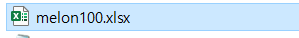

# Parameter 처리하기
>GET 방식

# [GET] 네이버 검색결과 수집하기

In [125]:
PATH='https://m.search.naver.com/search.naver?query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&sm=mtp_hty.top&where=m'

In [126]:
keyword=input('검색어 입력 : ')

검색어 입력 : 인공지능


In [127]:
resp = requests.get(PATH, params = {'query': keyword})
resp

<Response [200]>

In [128]:
html_src = resp.text
html_src

'<!doctype html> <html lang="ko"><head> <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"> <meta http-equiv="Content-Script-Type" content="text/javascript"> <meta name="referrer" content="always"> <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0, minimum-scale=1.0, user-scalable=yes"> <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="인공지능 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'인공지능\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'인공지능\'의 네이버 통합검색 결과입니다."> <title>인공지능 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118.ico">  <style type="text/css"> noscript_disp { display: none; } </style><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel

In [129]:
soup = BeautifulSoup(html_src, 'lxml')
soup

<!DOCTYPE html>
<html lang="ko"><head> <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/> <meta content="text/javascript" http-equiv="Content-Script-Type"/> <meta content="always" name="referrer"/> <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0, minimum-scale=1.0, user-scalable=yes" name="viewport"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="인공지능 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'인공지능'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'인공지능'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>인공지능 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118.ico" rel="shortcut icon"/> <style type="text/css"> noscript_disp { display: none; } </style><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link 

In [130]:
result = soup.select('.news_tit') 
result

[<a class="news_tit" href="https://n.news.naver.com/article/009/0005228010?sid=101" onclick="return goOtherCR(this, 'a=nws_1st*j.title&amp;r=1&amp;i=880000BC_000000000000000005228010&amp;g=&amp;u='+urlencode(urlexpand(this.href)));"> <div class="api_txt_lines tit">“얼굴인식 수집하지마” 세계최초 <mark>인공지능</mark> 규제법, 유럽서 나왔다</div> </a>,
 <a class="news_tit" href="https://n.news.naver.com/article/003/0012259015?sid=105" onclick="return goOtherCR(this, 'a=nws_1st*j.title&amp;r=2&amp;i=88000127_000000000000000012259015&amp;g=&amp;u='+urlencode(urlexpand(this.href)));"> <div class="api_txt_lines tit">"AI 폰 진화인데"…갤럭시 S24·아이폰16, 램 용량 안 부족할까</div> </a>,
 <a class="news_tit" href="https://m.etoday.co.kr/view.php?idxno=2310531" onclick="return goOtherCR(this, 'a=nws_1st*f.title&amp;r=3&amp;i=88000393_000000000000000001905559&amp;g=5003.0001905559&amp;u='+urlencode(urlexpand(this.href)));"> <div class="api_txt_lines tit">"모빌리티ㆍAI 기술 대거 선봬"…LG이노텍, CES 2024 부스 2배로 키웠다</div> </a>,
 <a class="news_tit" href="htt

In [110]:
for a in result:
    print(a.text, a['href'])

 “얼굴인식 수집하지마” 세계최초 인공지능 규제법, 유럽서 나왔다  https://n.news.naver.com/article/009/0005228010?sid=101
 "AI 폰 진화인데"…갤럭시 S24·아이폰16, 램 용량 안 부족할까  https://n.news.naver.com/article/003/0012259015?sid=105
 "모빌리티ㆍAI 기술 대거 선봬"…LG이노텍, CES 2024 부스 2배로 키웠다  https://m.etoday.co.kr/view.php?idxno=2310531
 [인공지능 365] 오픈소스 진영이 움직인다  https://it.chosun.com/news/articleView.html?idxno=2023092106173


# requests의 한계 
>셀레니움이 필요한 이유

In [112]:
import requests
from bs4 import BeautifulSoup

In [113]:
response = requests.get('https://korean.visitkorea.or.kr/')
html_src = response.text

In [114]:
soup = BeautifulSoup(html_src, 'html.parser')